# ***DataMining Lab 1***
I6079633 Jan Schmidt

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# **Task 1**

In [ ]:
#task 1 setup
b0, b1, b2, b3, b4, b5 = 50, 20, 0.07, 35, 0.01, -10

x1 = np.arange(0, 5, dtype=float)
x2 = 110
x3m, x3f = 0, 1
x4 = x1*x2
x5m, x5f = x1*x3m, x1*x3f

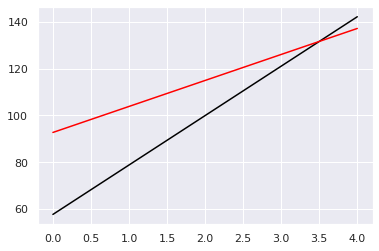

In [ ]:
out_m = b0+b1*x1+b2*x2+b3*x3m+b4*x4+b5*x5m #output form males based on GPA
out_f = b0+b1*x1+b2*x2+b3*x3f+b4*x4+b5*x5f #output form males based on GPA

plt.plot(x1, out_m, color = "black", label="male");
plt.plot(x1, out_f, color = "red", label="female");



> Task 1a)


**The right answer is: iii**

---
As the graph above shows the salary of women is higher than that of males till the crosspoint of *3.5 GPA*. After this point the salary of man is higher. As both graphes ae linear it is unlikly to change afterwards.


In [ ]:
out = ß0+ß1*x1[4]+ß2*x2+ß3*x3f+ß4*x4[4]+ß5*x5f[4]
print(out)

137.1




---


> Task 1b

**The answer is: 137.1**


---



# **Task 2**

In [ ]:
np.random.seed(42) #setup random seed for all models

## Sample1

**a)-c)**
Defining the first model for linear regession

In [ ]:
vec_x = np.random.normal(0.0,1.0,100)
vec_eps = np.random.normal(0.0,0.25,100) 

vec_y = -1 + 0.5*vec_x + vec_eps

seq_x = np.linspace(vec_x.min(),vec_x.max(),300).reshape(-1,1)

$\beta0$ is -1 and $\beta1$ is 0.5

**d)**

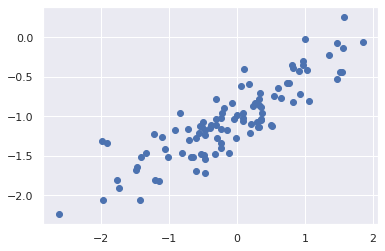

In [ ]:
plt.scatter(vec_x, vec_y);



*   It is ranging from -2.8 to 1.9 on the x axis
*   It is ranging from -2.6 to 0.9 on the x axis
*   the higher the x value the higer the y value





**e)**

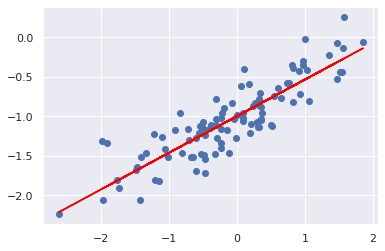

In [ ]:
model = LinearRegression(fit_intercept=True)

model.fit(vec_x[:, np.newaxis],vec_y)


fit_y = model.predict(vec_x[:, np.newaxis])

plt.scatter(vec_x, vec_y)
plt.plot(vec_x, fit_y, color='red');

$\beta0'$ and $\beta1'$ are similar to $\beta0$ and $\beta1$


---
As the graph is at $y=-1$ when $x=0$ and $y$ is increasing by $0.5$ int a step of $\Delta x = 1$


In [ ]:
score = r2_score(vec_y,fit_y)
print(score)

0.7610892255181196


This linear regression has a R2 score. This is a reasonable score.

**f)**

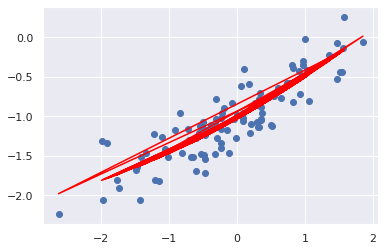

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())

poly_model.fit(vec_x[:, np.newaxis], vec_y)
polyfit_y = poly_model.predict(vec_x[:, np.newaxis])

plt.scatter(vec_x, vec_y)
plt.plot(vec_x, polyfit_y, color='red');

This doesn't seems right. I wasn't able to get a better result  for a polynomial model using sklearn.

In [ ]:
score = r2_score(vec_y,polyfit_y)
print(score)

0.7722109123605961


But the score is better than for the linear regression (Seems that the score can't always be trusted)

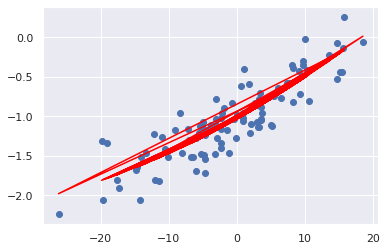

In [ ]:
vec2_x = vec_x * 10
vec_xx = vec2_x ** 2
poly_model = LinearRegression(fit_intercept=True)

poly_model.fit(np.vstack([vec2_x,vec_xx]).T, vec_y)
polyfit_y = poly_model.predict(np.vstack([vec2_x,vec_xx]).T)

plt.scatter(vec2_x, vec_y)
plt.plot(vec2_x, polyfit_y, color="red");


Thas hasn't worked right as well

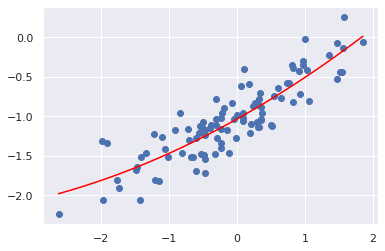

In [ ]:
nPolyfit = np.polyfit(vec_x.flatten(), vec_y.flatten(), 2)

plt.scatter(vec_x,vec_y)
plt.plot(seq_x, np.polyval(nPolyfit, seq_x), color="red");

There may be a slight improvment as in the lower part the curve is nearer to the 2 outliers and as such has a better least square error.

---

In other tests the model is the same as the linear one

---

Wasn't able to use r2_score in this results

## Sample 2

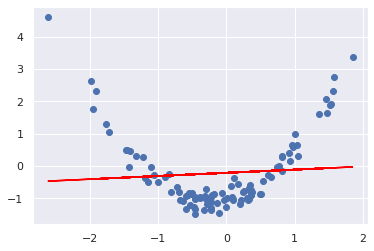

In [ ]:
vec2_y = -1 + 0.5*vec_x + vec_x*vec_x + vec_eps

model2 = LinearRegression(fit_intercept=True)
model2.fit(vec_x[:, np.newaxis],vec2_y)


fit2_y = model2.predict(vec_x[:, np.newaxis])

plt.scatter(vec_x, vec2_y)
plt.plot(vec_x, fit2_y, color='red');

As it should be expected: The line doesn't follow the data points.
This is the limit of liniar regression as a simple line graph isn't design to follow a curve.

In [ ]:
score = r2_score(vec2_y,fit2_y)
print(score)

0.005680018516918128


As expected the R2 score is low (basicly no point fits)

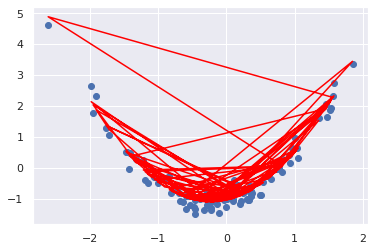

In [ ]:
poly_model2 = make_pipeline(PolynomialFeatures(2), LinearRegression())

poly_model2.fit(vec_x[:, np.newaxis], vec2_y)
polyfit_y = poly_model2.predict(vec_x[:, np.newaxis])

plt.scatter(vec_x, vec2_y)
plt.plot(vec_x, polyfit_y, color='red');

As with the other model I couldn't bring the polynomial regression to for sklearn (if you can me tell what wrong would be super)

In [ ]:
score = r2_score(vec2_y,polyfit_y)
print(score)

-0.48550376518309935


A real horrible result for the R2 score (thats good as this is a horrible regession)

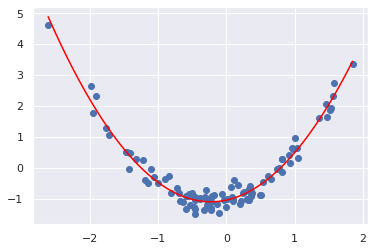

In [ ]:
nPolyfit = np.polyfit(vec_x.flatten(), vec2_y.flatten(), 2)

plt.scatter(vec_x,vec2_y)
plt.plot(seq_x, np.polyval(nPolyfit, seq_x), color="red");

This graph follows nearly the original $\beta0$, $\beta1$ and $\beta2$